In [33]:
%pylab inline --no-import-all
plt.rc('font', family='serif', serif='Times', size=15)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('figure', titlesize=25)
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['axes.linewidth'] = 2.
from astropy.io import fits
import astropy.units as u
import astropy.constants as c
import pandas as pd
import logging as log
from crispy.tools.initLogger import getLogger
log = getLogger('main')
import os
os.chdir('/Users/mrizzo/IFS/crispy/crispy/WFIRST/')
from params import Params
par = Params()
par.hdr
from crispy.tools.imgtools import gausspsf


Populating the interactive namespace from numpy and matplotlib


# Centroid accuracy: center of mass

In [4]:
from photutils import centroid_com,centroid_1dg,centroid_2dg

## No noise (just sampling)

In [28]:
Ntrials = 10000
size=20
fwhm=2
offset_x = 0.1
offset_y = 0.2
def nonoise(centroid,size=20,fwhm=1,offsetx = 0.0,offsety=0.0):
    center = []
    offx = []
    offy = []
    offxy = []
    for i in range(Ntrials):
        img_center = gausspsf(size=size,fwhm=fwhm)
        img_offx= gausspsf(size=size,fwhm=fwhm,offx=offset_x)
        img_offy= gausspsf(size=size,fwhm=fwhm,offy=offset_y)
        img_offxy= gausspsf(size=size,fwhm=fwhm,offx=offset_x,offy=offset_y)    
        center.append(centroid(img_center))
        offx.append(centroid(img_offx))
        offy.append(centroid(img_offy))
        offxy.append(centroid(img_offxy))
    center = np.asarray(center)
    offx = np.asarray(offx)
    offy = np.asarray(offy)
    offxy = np.asarray(offxy)
    print ("Expected: {:} || Measured: {:} +/- {:}".format(
        (size//2, size//2), np.mean(center, axis=0), np.std(center, axis=0)))
    print ("Expected: {:} || Measured: {:} +/- {:}".format(
        (size//2-offset_x, size//2), np.mean(offx, axis=0), np.std(offx, axis=0)))
    print ("Expected: {:} || Measured: {:} +/- {:}".format(
        (size//2, size//2-offset_y), np.mean(offy, axis=0), np.std(offy, axis=0)))
    print ("Expected: {:} || Measured: {:} +/- {:}".format(
        (size//2-offset_x, size//2-offset_y), np.mean(offxy, axis=0), np.std(offxy, axis=0)))
    return center,offx,offy,offxy

center,offx,offy,offxy=nonoise(centroid_com,size=size,fwhm=fwhm,offsetx = offset_x,offsety=offset_y)


Expected: (10, 10) || Measured: [ 10.  10.] +/- [  1.24344979e-14   3.55271368e-15]
Expected: (9.9, 10) || Measured: [  9.90000012  10.        ] +/- [  5.98632255e-13   1.77635684e-15]
Expected: (10, 9.8) || Measured: [10.          9.80000019] +/- [  7.10542736e-15   1.12798659e-12]
Expected: (9.9, 9.8) || Measured: [ 9.90000012  9.80000019] +/- [  6.03961325e-13   1.12443388e-12]


(array([[ 10.,  10.],
        [ 10.,  10.],
        [ 10.,  10.],
        ..., 
        [ 10.,  10.],
        [ 10.,  10.],
        [ 10.,  10.]]), array([[  9.90000012,  10.        ],
        [  9.90000012,  10.        ],
        [  9.90000012,  10.        ],
        ..., 
        [  9.90000012,  10.        ],
        [  9.90000012,  10.        ],
        [  9.90000012,  10.        ]]), array([[10.        ,  9.80000019],
        [10.        ,  9.80000019],
        [10.        ,  9.80000019],
        ..., 
        [10.        ,  9.80000019],
        [10.        ,  9.80000019],
        [10.        ,  9.80000019]]), array([[ 9.90000012,  9.80000019],
        [ 9.90000012,  9.80000019],
        [ 9.90000012,  9.80000019],
        ..., 
        [ 9.90000012,  9.80000019],
        [ 9.90000012,  9.80000019],
        [ 9.90000012,  9.80000019]]))

In [4]:
center,offx,offy,offxy=nonoise(centroid_1dg,size=size,fwhm=fwhm,offsetx = offset_x,offsety=offset_y)


Expected: (10, 10) || Measured: [ 10.  10.] +/- [  6.03961325e-14   6.03961325e-14]
Expected: (9.9, 10) || Measured: [  9.89993503  10.        ] +/- [  1.91846539e-13   6.03961325e-14]
Expected: (10, 9.8) || Measured: [ 10.           9.79989242] +/- [  6.03961325e-14   6.21724894e-14] (\%)
Expected: (9.9, 9.8) || Measured: [ 9.89993503  9.79989242] +/- [  1.91846539e-13   5.68434189e-14]


In [5]:
center,offx,offy,offxy=nonoise(centroid_2dg,size=size,fwhm=fwhm,offsetx = offset_x,offsety=offset_y)


Expected: (10, 10) || Measured: [ 10.  10.] +/- [  9.05941988e-14   1.01252340e-13]
Expected: (9.9, 10) || Measured: [  9.8999341  10.       ] +/- [  1.36779477e-13   1.03028697e-13]
Expected: (10, 9.8) || Measured: [ 10.           9.79989102] +/- [  1.42108547e-13   1.31450406e-13] (\%)
Expected: (9.9, 9.8) || Measured: [ 9.89993408  9.79989102] +/- [  1.74082970e-13   2.48689958e-14]


In [182]:
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats
def daocentroid(image):
    mean, median, std = sigma_clipped_stats(image, sigma=3.0, iters=5)
    daofind = DAOStarFinder(fwhm=1.0, threshold=3.*std)
    sources = daofind(image - median)
    return np.array([sources['xcentroid'][0], sources['ycentroid'][0]])

img_center = np.random.poisson(
            gausspsf(size=20, fwhm=1.0)*100)
daocentroid(img_center)

array([ 10.0210607 ,   9.84781626])

## With noise

In [16]:
def wnoise(centroid, signal=1000, bkgd=10, size=20, fwhm=1, offsetx=0.0, offsety=0.0, 
           thresh=0.0, Ntrials=1000,verbose=True):
    center = []
    offx = []
    offy = []
    offxy = []
    for i in range(Ntrials):
        img_center = np.random.poisson(
            gausspsf(size=size, fwhm=fwhm)*signal+bkgd)-bkgd
        img_offx = np.random.poisson(
            gausspsf(size=size, fwhm=fwhm, offx=offsetx)*signal+bkgd)-bkgd
        img_offy = np.random.poisson(
            gausspsf(size=size, fwhm=fwhm, offy=offsety)*signal+bkgd)-bkgd
        img_offxy = np.random.poisson(
            gausspsf(size=size, fwhm=fwhm, offx=offsetx, offy=offsety)*signal+bkgd)-bkgd
        if thresh>0.0: mask = img_center<thresh*np.amax(img_center)
        else: mask = np.zeros_like(img_center)
        center.append(centroid(img_center,mask=mask))
        if thresh>0.0: mask = img_offx<thresh*np.amax(img_offx)
        offx.append(centroid(img_offx,mask=mask))
        if thresh>0.0: mask = img_offy<thresh*np.amax(img_offy)
        offy.append(centroid(img_offy,mask=mask))
        if thresh>0.0:  mask = img_offxy<thresh*np.amax(img_offxy)
        offxy.append(centroid(img_offxy,mask=mask))
    center = np.asarray(center)
    offx = np.asarray(offx)
    offy = np.asarray(offy)
    offxy = np.asarray(offxy)
    if verbose:
        print ("Th. SNR: {:}".format(
            signal/(np.sqrt(signal+4*np.pi*(fwhm/2.35)**2*bkgd))))
        print ("Expected: {:} || Measured: {:} +/- {:}".format(
            (size//2, size//2), np.mean(center, axis=0), np.std(center, axis=0)))
        print ("Expected: {:} || Measured: {:} +/- {:}".format(
            (size//2-offsetx, size//2), np.mean(offx, axis=0), np.std(offx, axis=0)))
        print ("Expected: {:} || Measured: {:} +/- {:}".format(
            (size//2, size//2-offsety), np.mean(offy, axis=0), np.std(offy, axis=0)))
        print ("Expected: {:} || Measured: {:} +/- {:}".format(
            (size//2-offsetx, size//2-offsety), np.mean(offxy, axis=0), np.std(offxy, axis=0)))
    return center, offx, offy, offxy, img_offxy

In [143]:
def wnoise_nomask(centroid, signal=1000, bkgd=10, size=20, fwhm=1, offsetx=0.0, offsety=0.0, 
           thresh=0.0, Ntrials=1000,verbose=True):
    center = []
    offx = []
    offy = []
    offxy = []
    for i in range(Ntrials):
        img_center = np.random.poisson(
            gausspsf(size=size, fwhm=fwhm)*signal+bkgd)-bkgd
        img_offx = np.random.poisson(
            gausspsf(size=size, fwhm=fwhm, offx=offsetx)*signal+bkgd)-bkgd
        img_offy = np.random.poisson(
            gausspsf(size=size, fwhm=fwhm, offy=offsety)*signal+bkgd)-bkgd
        img_offxy = np.random.poisson(
            gausspsf(size=size, fwhm=fwhm, offx=offsetx, offy=offsety)*signal+bkgd)-bkgd
        center.append(centroid(img_center))
        offx.append(centroid(img_offx))
        offy.append(centroid(img_offy))
        offxy.append(centroid(img_offxy))
    center = np.asarray(center)
    offx = np.asarray(offx)
    offy = np.asarray(offy)
    offxy = np.asarray(offxy)
    if verbose:
        print ("Th. SNR: {:}".format(
            signal/(np.sqrt(signal+4*np.pi*(fwhm/2.35)**2*bkgd))))
        print ("Expected: {:} || Measured: {:} +/- {:}".format(
            (size//2, size//2), np.mean(center, axis=0), np.std(center, axis=0)))
        print ("Expected: {:} || Measured: {:} +/- {:}".format(
            (size//2-offsetx, size//2), np.mean(offx, axis=0), np.std(offx, axis=0)))
        print ("Expected: {:} || Measured: {:} +/- {:}".format(
            (size//2, size//2-offsety), np.mean(offy, axis=0), np.std(offy, axis=0)))
        print ("Expected: {:} || Measured: {:} +/- {:}".format(
            (size//2-offsetx, size//2-offsety), np.mean(offxy, axis=0), np.std(offxy, axis=0)))
    return center, offx, offy, offxy, img_offxy

Th. SNR: 11.7238161618
Expected: (10, 10) || Measured: [ 10.00110254   9.99970357] +/- [ 0.20105462  0.20222543]
Expected: (9.7, 10) || Measured: [  9.66775227  10.00049254] +/- [ 0.16125588  0.20046837]
Expected: (10, 9.8) || Measured: [ 10.00024535   9.76524383] +/- [ 0.19928961  0.17744707]
Expected: (9.7, 9.8) || Measured: [ 9.66050437  9.75108567] +/- [ 0.15948485  0.17706427]


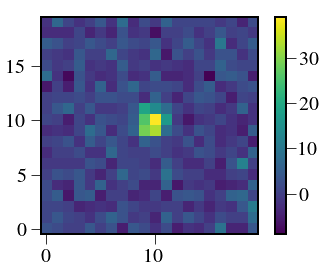

In [13]:
center, offx, offy, offxy, last_img = wnoise(
    centroid_com, signal=200, bkgd=10, size=20, fwhm=2, offsetx=0.3, offsety=0.2,
    thresh = 0.5,Ntrials=10000)
plt.imshow(last_img)
plt.colorbar()

In [14]:
print offxy.shape

(10000, 2)


# Plots

## No background

In [18]:
signals = [10,30,100,300,1000,3000,10000]
results = np.zeros((len(signals),2,2))
for i,s in enumerate(signals):
    _, _, _, offxy, _ = wnoise(
    centroid_com, signal=s, bkgd=0, size=20, fwhm=2, offsetx=0.3, offsety=0.2,
    thresh = 0.0,Ntrials=1000,verbose=False)
    results[i] = np.array([np.mean(offxy,axis=0),np.std(offxy,axis=0)])


/Users/mrizzo/anaconda2/lib/python2.7/site-packages/photutils/centroids/core.py:124: RuntimeWarning: invalid value encountered in double_scalars
  xcen = m[1, 0] / m[0, 0]
/Users/mrizzo/anaconda2/lib/python2.7/site-packages/photutils/centroids/core.py:125: RuntimeWarning: invalid value encountered in double_scalars
  ycen = m[0, 1] / m[0, 0]


In [23]:
print results.shape
print results[0,0,1]

(7, 2, 2)
9.78563463648


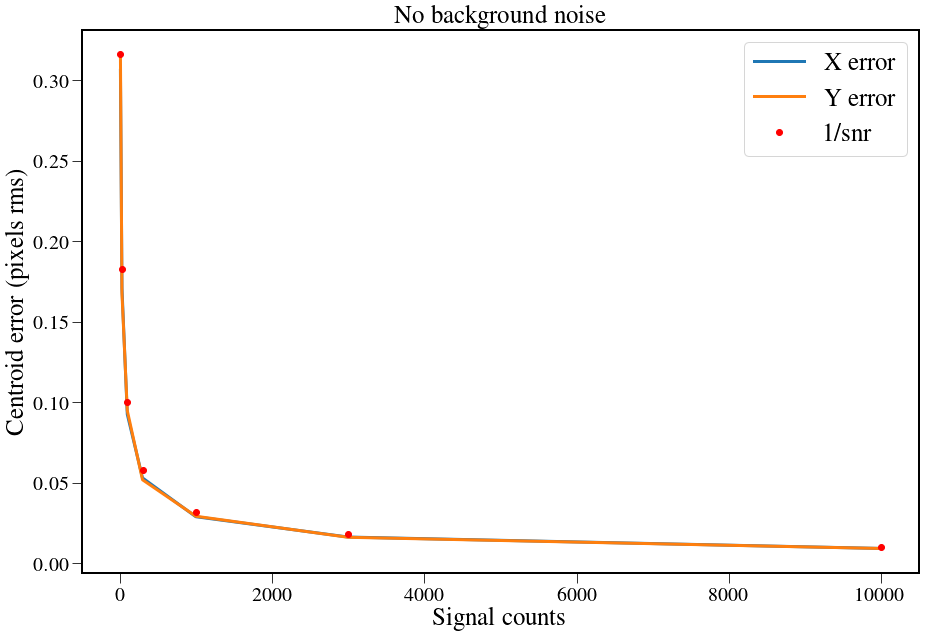

In [35]:
plt.figure(figsize=(15,10))
plt.plot(signals,results[:,1,0],lw=3,label='X error')
plt.plot(signals,results[:,1,1],lw=3,label='Y error')
plt.plot(signals,1./np.sqrt(signals),'ro',label='1/snr')
plt.xlabel("Signal counts",fontsize=25)
plt.ylabel("Centroid error (pixels rms)",fontsize=25)
plt.title("No background noise",fontsize=25)
plt.legend(fontsize=25)

## With background

Expected: [9.7, 9.8]
Measured X: [ 9.46882666  9.46253428  9.69263704  9.70248736  9.71152616  9.70405938]
Measured Y: [ 9.50860103  9.60779195  9.79942284  9.82575081  9.85203966  9.86675832]


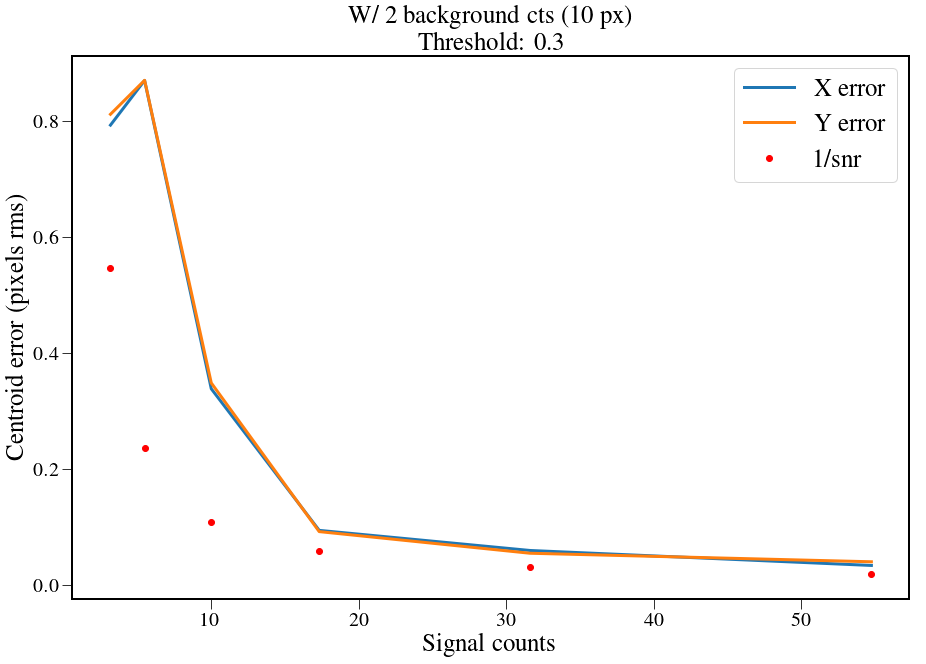

In [53]:
signals = [10,30,100,300,1000,3000]
results = np.zeros((len(signals),2,2))
bkgd = 2
thresh = 0.3
for i,s in enumerate(signals):
    _, _, _, offxy, _ = wnoise(
    centroid_com, signal=s, bkgd=bkgd, size=20, fwhm=2, offsetx=0.3, offsety=0.2,
    thresh = thresh,Ntrials=1000,verbose=False)
    results[i] = np.array([np.mean(offxy,axis=0),np.std(offxy,axis=0)])
plt.figure(figsize=(15,10))
print "Expected: {:}".format([10-0.3, 10-0.2])
print "Measured X:",results[:,0,0]
print "Measured Y:",results[:,0,1]
plt.plot(np.sqrt(signals),results[:,1,0],lw=3,label='X error')
plt.plot(np.sqrt(signals),results[:,1,1],lw=3,label='Y error')
plt.plot(np.sqrt(signals),np.sqrt(np.array(signals)+10*bkgd)/signals,'ro',label='1/snr')
plt.xlabel("SNR",fontsize=25)
plt.ylabel("Centroid error (pixels rms)",fontsize=25)
plt.title("W/ %d background cts (10 px)\n Threshold: %.1f" % (bkgd,thresh),fontsize=25)
plt.legend(fontsize=25)

In [184]:
center, offx, offy, offxy, img_offxy = wnoise_nomask(
    daocentroid, signal=100, bkgd=0.0, size=20, fwhm=1., offsetx=0.3, offsety=0.2,
    thresh = thresh,Ntrials=1,verbose=False)
print center, offx, offy, offxy
center, offx, offy, offxy, img_offxy = wnoise_nomask(
    centroid_com, signal=100, bkgd=0.0, size=20, fwhm=1., offsetx=0.3, offsety=0.2,
    thresh = thresh,Ntrials=1,verbose=False)
print center, offx, offy, offxy

[[ 9.90790226  9.94879134]] [[  9.48121212  10.00841002]] [[ 10.24963677   9.5351072 ]] [[ 9.34044715  9.68686975]]
[[  9.93859649  10.05263158]] [[  9.66346154  10.01923077]] [[ 9.9380531   9.84070796]] [[ 9.82978723  9.79787234]]


[[  9.97722567  10.00724638]] [[  9.68008256  10.05469556]] [[ 9.94842407  9.7765043 ]] [[ 9.69868554  9.8463094 ]]


Expected: [9.7, 9.8]
Measured X: [ 9.25839902  9.26360036  9.26557858]
Measured Y: [ 9.57368778  9.57516582  9.57800552]


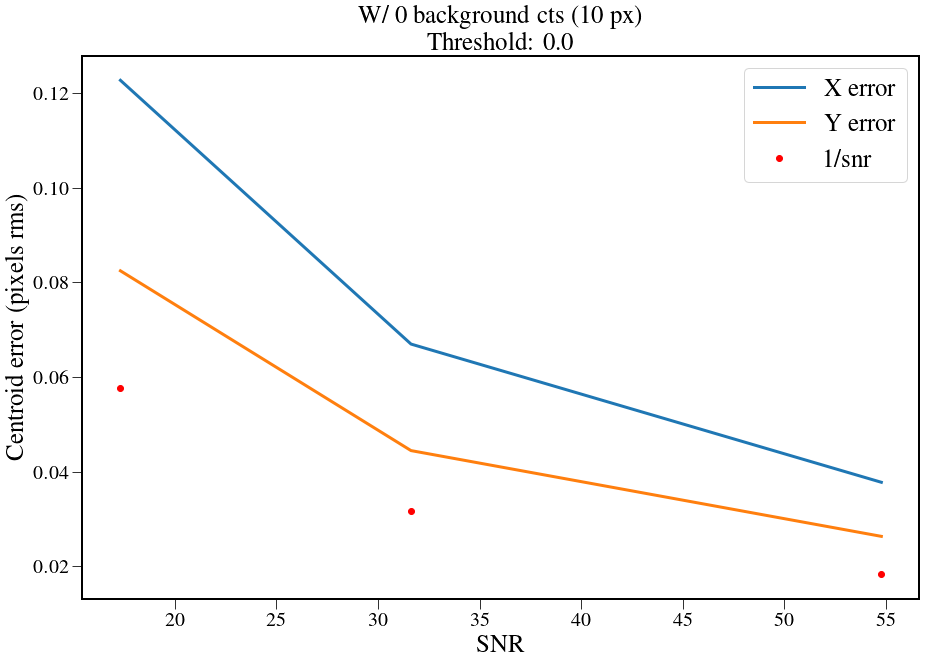

In [185]:
signals = [300,1000,3000]
results = np.zeros((len(signals),2,2))
bkgd = 0.0
thresh = 0.0
for i,s in enumerate(signals):
    _, _, _, offxy, _ = wnoise_nomask(
    daocentroid, signal=s, bkgd=bkgd, size=20, fwhm=1, offsetx=0.3, offsety=0.2,
    thresh = thresh,Ntrials=1000,verbose=False)
    results[i] = np.array([np.mean(offxy,axis=0),np.std(offxy,axis=0)])
plt.figure(figsize=(15,10))
print "Expected: {:}".format([10-0.3, 10-0.2])
print "Measured X:",results[:,0,0]
print "Measured Y:",results[:,0,1]
plt.plot(np.sqrt(signals),results[:,1,0],lw=3,label='X error')
plt.plot(np.sqrt(signals),results[:,1,1],lw=3,label='Y error')
plt.plot(np.sqrt(signals),np.sqrt(np.array(signals)+10*bkgd)/signals,'ro',label='1/snr')
plt.xlabel("SNR",fontsize=25)
plt.ylabel("Centroid error (pixels rms)",fontsize=25)
plt.title("W/ %d background cts (10 px)\n Threshold: %.1f" % (bkgd,thresh),fontsize=25)
plt.legend(fontsize=25)

# Grid search method

Essentially, move the model PSF around until the multiplication by the data is maximum

## Setup and tests

In [138]:
def score(data, template):
    return np.sum(data*template)


def gridSearch(signal=1000, bkgd=10, size=20, fwhm=1, offsetx=0.0, offsety=0.0,
               thresh=0.0, Ntrials=1, verbose=True):
    npix = 1
    ncells = 51
    xgrid = np.linspace(-npix/2., npix/2., ncells)
    xgrid, ygrid = np.meshgrid(xgrid, xgrid)

    offxy = []

    for n in range(Ntrials):
        scoremap = np.zeros((ncells, ncells))

        img_offxy = np.random.poisson(
            gausspsf(size=size, fwhm=fwhm, offx=offsetx, offy=offsety)*signal+bkgd)-bkgd

        for i in range(ncells):
            for j in range(ncells):
                dx = xgrid[i, j]
                dy = ygrid[i, j]
                template = gausspsf(size=size, fwhm=fwhm, offx=dx, offy=dy)
                scoremap[i, j] = score(img_offxy, template)
        coords = np.unravel_index(scoremap.argmax(), scoremap.shape)
        offxy.append([xgrid[coords], ygrid[coords]])
    offxy = np.asarray(offxy)
    if verbose:
        print ("Th. SNR: {:}".format(
            signal/(np.sqrt(signal+4*np.pi*(fwhm/2.35)**2*bkgd))))
        print ("Expected: {:} || Measured: {:} +/- {:}".format(
            (offsetx, offsety), np.mean(offxy, axis=0), np.std(offxy, axis=0)))

    return offxy,scoremap,img_offxy

In [135]:
offxy,scoremap,img_offxy = gridSearch(signal=500, bkgd=50, size=20, fwhm=2, offsetx=0.1, offsety=0.15,
                   thresh=0.0, Ntrials=30, verbose=True)

Th. SNR: 26.2152498936
Expected: (0.1, 0.15) || Measured: [ 0.08133333  0.15133333] +/- [ 0.04716873  0.0442518 ]


In [116]:
print np.std(offxy,axis=0)

[ 0.17758378  0.19041008]


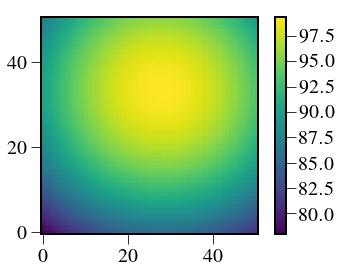

In [130]:
plt.imshow(scoremap)
plt.colorbar()

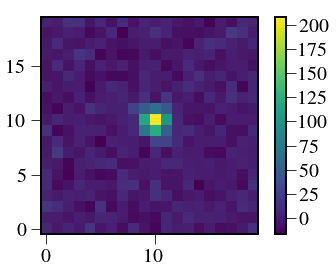

In [133]:
plt.imshow(img_offxy)
plt.colorbar()

## Plots

Expected: [0.3, 0.2]
Measured X: [ 0.36687688  0.33429827  0.28458142  0.28269362  0.29462387] [ 0.1876  0.2864  0.2962  0.2904  0.2986]
Measured Y: [ 0.14387805  0.19837816  0.16926829  0.16005095  0.13783876] [ 0.1524  0.2042  0.1982  0.2002  0.1994]


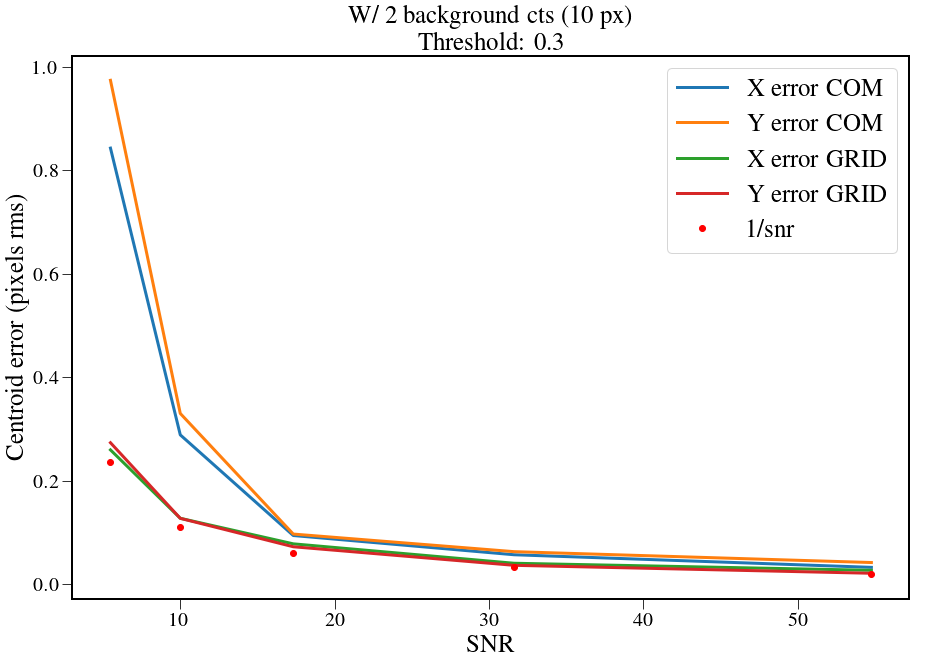

In [140]:
signals = [30,100,300,1000,3000]
results = np.zeros((len(signals),2,2))
resulstsgrid = np.zeros((len(signals),2,2))
bkgd = 2
thresh = 0.3
offx = 0.3
offy = 0.2
Ntrials = 100
for i,s in enumerate(signals):
    _, _, _, offxy, _ = wnoise(
    centroid_com, signal=s, bkgd=bkgd, size=20, fwhm=2, offsetx=offx, offsety=offy,
    thresh = thresh,Ntrials=Ntrials,verbose=False)
    offxygrid,_,_ = gridSearch(signal=s, bkgd=bkgd, size=20, fwhm=2, offsetx=offx, offsety=offy,
                   thresh=thresh, Ntrials=Ntrials, verbose=False)
    resulstsgrid[i] = np.array([np.mean(offxygrid,axis=0),np.std(offxygrid,axis=0)])
    results[i] = np.array([np.mean(offxy,axis=0),np.std(offxy,axis=0)])
plt.figure(figsize=(15,10))
print "Expected: {:}".format([offx, offy])
print "Measured X:",10-results[:,0,0],resulstsgrid[:,0,0]
print "Measured Y:",10-results[:,0,1],resulstsgrid[:,0,1]
plt.plot(np.sqrt(signals),results[:,1,0],lw=3,label='X error COM')
plt.plot(np.sqrt(signals),results[:,1,1],lw=3,label='Y error COM')
plt.plot(np.sqrt(signals),resulstsgrid[:,1,0],lw=3,label='X error GRID')
plt.plot(np.sqrt(signals),resulstsgrid[:,1,1],lw=3,label='Y error GRID')
plt.plot(np.sqrt(signals),np.sqrt(np.array(signals)+10*bkgd)/signals,'ro',label='1/snr')
plt.xlabel("SNR",fontsize=25)
plt.ylabel("Centroid error (pixels rms)",fontsize=25)
plt.title("W/ %d background cts (10 px)\n Threshold: %.1f" % (bkgd,thresh),fontsize=25)
plt.legend(fontsize=25)